In [86]:
"""Calculation of the Kaustik of a Laserbeam."""

import matplotlib.pyplot as plt
import numpy as np
import importlib.util
from SecondaryValue import SecondaryValue

In [87]:
# Input Parameters
R = 100  # cm
L = 46  # cm
f = 15  # cm
lam = 633e-8  # cm
lens_pos = 15 # cm

In [88]:
# Optical Matrix Elements
A = SecondaryValue('1-x/f', defaults=dict(f=f))
B = SecondaryValue('s+x-x*s/f', defaults=dict(f=f))
C = SecondaryValue('-1/f', defaults=dict(f=f))
D = SecondaryValue('1-s/f', defaults=dict(f=f))



In [89]:
w0 = SecondaryValue('((l/pi)^2*L*(R-L))^(1/4)', defaults=dict(l=lam, L=L, R=R, pi=np.pi))

In [90]:
# b parameter
b = SecondaryValue('l/(pi*w0^2)', defaults=dict(l=lam, pi=np.pi), dependencies=dict(w0=w0))
new_b = SecondaryValue('b*(A*D-C*B)/(A^2+B^2*b^2)', dependencies=dict(A=A, B=B, C=C, D=D, b=b))
b_before = SecondaryValue('b/(1+x^2*b^2)', dependencies=dict(b=b))

In [91]:
# omega
w = SecondaryValue('sqrt(l/(p*b))', defaults=dict(l=lam, p=np.pi), dependencies=dict(b=new_b))
w_before = SecondaryValue('sqrt(l/(p*b))', defaults=dict(l=lam, p=np.pi), dependencies=dict(b=b_before))

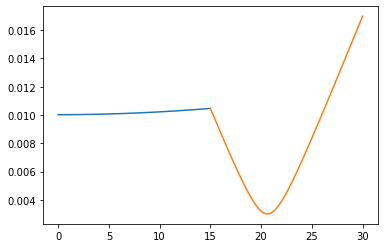

In [94]:
xs_before = np.linspace(0, lens_pos, 1000)
xs_after = np.linspace(0, 40, 1000)
plt.plot(xs, w_before(x=[xs_before]))
plt.plot(xs + lens_pos, w(s=lens_pos, x=[xs_after]))

In [93]:
w0()

0.010021086630321032